<a href="https://colab.research.google.com/github/Christine-Tinguo/ASTGCN/blob/master/Credit_LendingClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Environment set up

1. python==3.7.10

2. pip install requirements.txt

# Data uncompression

1. put train_data.csv, train_labels.csv, test_data.csv in ./input/

# Running

1. sh run.sh

# Result

1. final submission in ./output/final_submission.csv.zip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Credit_risk/Kaggle-American-Express

/content/drive/MyDrive/Credit_risk/Kaggle-American-Express


In [3]:
!unzip /content/drive/MyDrive/Credit_risk/Lending_Club_Credit.zip -d /content/drive/MyDrive/Credit_risk/P2P-lending-with-AI-master

Archive:  /content/drive/MyDrive/Credit_risk/Lending_Club_Credit.zip
  inflating: /content/drive/MyDrive/Credit_risk/P2P-lending-with-AI-master/Kaggle-American-Express/scheduler.py  
  inflating: /content/drive/MyDrive/Credit_risk/P2P-lending-with-AI-master/Kaggle-American-Express/S6_NN_main.py  
  inflating: /content/drive/MyDrive/Credit_risk/P2P-lending-with-AI-master/Kaggle-American-Express/S2_manual_feature.py  
  inflating: /content/drive/MyDrive/Credit_risk/P2P-lending-with-AI-master/Kaggle-American-Express/model.py  
  inflating: /content/drive/MyDrive/Credit_risk/P2P-lending-with-AI-master/Kaggle-American-Express/S5_LGB_main.py  
  inflating: /content/drive/MyDrive/Credit_risk/P2P-lending-with-AI-master/Kaggle-American-Express/S4_feature_combined.py  
  inflating: /content/drive/MyDrive/Credit_risk/P2P-lending-with-AI-master/Kaggle-American-Express/S3_series_feature.py  
  inflating: /content/drive/MyDrive/Credit_risk/P2P-lending-with-AI-master/Kaggle-American-Express/README.md

In [ ]:
!unzip /content/drive/MyDrive/Credit_risk/Kaggle-American-Express/input/amex-default-prediction.zip

In [ ]:
!pip install requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement requirements.txt (from versions: none)
ERROR: No matching distribution found for requirements.txt


In [ ]:
!sh run.sh

In [ ]:
!python S1_denoise.py

start ------
train.shape (50000, 190)
100% 190/190 [00:00<00:00, 1391.33it/s]
test.shape (80000, 190)
100% 190/190 [00:00<00:00, 1113.31it/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

print("start ------")
train_L = pd.read_csv('/content/drive/MyDrive/Credit_risk/Kaggle-American-Express/input/train_labels.csv')
#train = pd.read_parquet('./input/train.parquet')
print("train_L.shape",train_L.shape)

start ------
train_L.shape (458913, 2)


In [ ]:
!python S2_manual_feature.py

-----------li-----------: 0
one hot encoding: B_30
one hot encoding: B_38
one hot encoding: D_114
one hot encoding: D_116
one hot encoding: D_117
one hot encoding: D_120
one hot encoding: D_126
one hot encoding: D_63
one hot encoding: D_64
one hot encoding: D_66
one hot encoding: D_68
cat_feature: 100% 16/16 [00:04<00:00,  3.73it/s]
prefix----: 
cat_feature_df.shape-----------: (10683, 208)
num_feature: 100% 16/16 [00:10<00:00,  1.52it/s]
prefix----: 
num_feature_df.shape-----------: (10683, 1063)
diff_feature: 100% 16/16 [00:06<00:00,  2.41it/s]
prefix----: 
diff_feature_df.shape-----------: (10683, 1063)
num_feature: 100% 16/16 [00:03<00:00,  4.63it/s]
prefix----: rank_
num_feature_df.shape-----------: (10683, 178)
num_feature: 100% 16/16 [00:07<00:00,  2.05it/s]
prefix----: ym_rank_
num_feature_df.shape-----------: (10683, 1063)
-----------li-----------: 1
all df shape (130000, 190)
last 3 shape (31725, 190)
one hot encoding: B_30
one hot encoding: B_38
one hot encoding: D_114
one h

In [ ]:
!python S3_series_feature.py

available gpus: []
-----------train.shape----------- (5000, 190)
-----------test.shape----------- (8000, 190)
(5000, 191) (8000, 190)
====utils.py====test.shape (8000, 190)
----features.len: 188
[50]	training's binary_logloss: 0.444032	valid_1's binary_logloss: 0.472427
[100]	training's binary_logloss: 0.385261	valid_1's binary_logloss: 0.428589
[150]	training's binary_logloss: 0.359246	valid_1's binary_logloss: 0.405767
[200]	training's binary_logloss: 0.345325	valid_1's binary_logloss: 0.397006
[250]	training's binary_logloss: 0.314403	valid_1's binary_logloss: 0.381821
[300]	training's binary_logloss: 0.29471	valid_1's binary_logloss: 0.376968
[350]	training's binary_logloss: 0.279002	valid_1's binary_logloss: 0.373886
[400]	training's binary_logloss: 0.270954	valid_1's binary_logloss: 0.371293
[450]	training's binary_logloss: 0.265217	valid_1's binary_logloss: 0.372245
[500]	training's binary_logloss: 0.243459	valid_1's binary_logloss: 0.370011
[550]	training's binary_logloss: 0.23

In [ ]:
#画feature importance
import pandas as pd
filepath = '/data/featureResult_v01_20/featureResult.20.2020-06-22.csv'
columns = pd.read_csv(filepath, index_col=0,nrows=0).columns.tolist()[1:-3]
df = pd.DataFrame()
df['feature name'] = columns
df['importance'] = bst.feature_importance()
df = df.sort_values('importance')
df.plot.barh(x = 'feature name',figsize=(10,12))

In [ ]:
def multiyy_plot():
    df = pd.read_csv("/content/drive/MyDrive/Credit_risk/Kaggle-American-Express/output/LGB_with_series_feature/feature_importance.csv")

    x = df['feature_name']
    y1 = df['importance_gain']
    y2 = df['importance_split']
    print('df.shape',df.shape)

    # Plot Line1 (Left Y Axis)
    fig, ax1 = plt.subplots(1, 1, figsize=(16, 9), dpi=80)
    ax1.plot(x, y1, color='tab:red')

    # Plot Line2 (Right Y Axis)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.plot(x, y2, color='tab:blue')

    # Decorations
    # ax1 (left Y axis)
    ax1.set_xlabel('feature_name', fontsize=20)
    ax1.tick_params(axis='x', rotation=0, labelsize=12)

    ax1.set_ylabel('importance_gain', color='tab:red', fontsize=20)
    ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red')
    ax1.grid(alpha=.4)

    # ax2 (right Y axis)
    ax2.set_ylabel("importance_gain", color='tab:blue', fontsize=20)
    ax2.tick_params(axis='y', labelcolor='tab:blue')

    ax2.set_xticks(np.arange(0, len(x), 5))
    ax2.set_xticklabels(x[::10], rotation=90, fontdict={'fontsize': 5})
    ax2.set_title("importance_split and importance_gain", fontsize=22)
    fig.tight_layout()
    plt.show()

df.shape (188, 3)


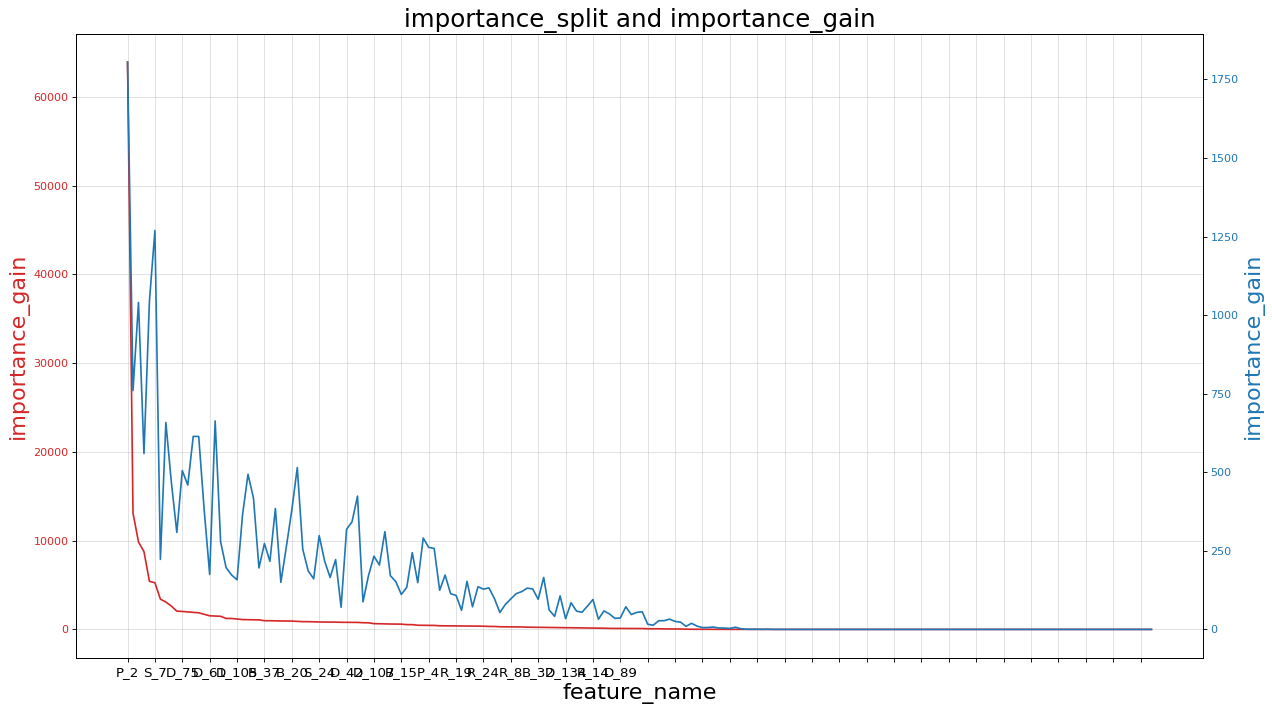

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
multiyy_plot()

In [ ]:
!python S4_feature_combined.py

available gpus: []
----tmp1.shape------ (411,)
----tmp2.shape------ (648,)
----tmp.shape------ (1059,)
----len(df)--before df.append(tmp)------ 9
----len(df)--after df.append(tmp)------ 10
----df.shape--all_feature.feather------ (10683, 6380)
100% 224/224 [00:00<00:00, 456.05it/s]
----df.shape--nn_series.feather------ (130000, 224)
100% 208/208 [00:00<00:00, 293.27it/s]
100% 1062/1062 [00:18<00:00, 57.60it/s] 
100% 1062/1062 [00:16<00:00, 64.85it/s] 
100% 177/177 [00:01<00:00, 174.25it/s]
100% 141/141 [00:00<00:00, 302.88it/s]
100% 885/885 [00:12<00:00, 70.36it/s] 
100% 885/885 [00:11<00:00, 75.24it/s] 
100% 885/885 [00:12<00:00, 72.34it/s] 
100% 1062/1062 [00:15<00:00, 68.45it/s] 
----tmp.shape------ (1059, 13)
----df.shape--nn_all_feature.feather------ (10683, 6380)


In [ ]:
!python S5_LGB_main.py

available gpus: []
====S5====df.shape (10683, 6380)
====S5====train_y.shape (5000, 2)
====S5====train_y.shape[0] 5000
====S5====test.shape (5683, 6380)
====S5====train_y.shape (5000, 2)
====S5====train.shape (5000, 6381)
(5000, 6381) (5683, 6380)
====S5====test.shape (5683, 6380)
====utils.py====test.shape (5683, 6380)
----features.len: 6366
[50]	training's binary_logloss: 0.491851	valid_1's binary_logloss: 0.486147
[100]	training's binary_logloss: 0.444213	valid_1's binary_logloss: 0.438194
[150]	training's binary_logloss: 0.42327	valid_1's binary_logloss: 0.416669
[200]	training's binary_logloss: 0.412982	valid_1's binary_logloss: 0.407476
[250]	training's binary_logloss: 0.387769	valid_1's binary_logloss: 0.381818
[300]	training's binary_logloss: 0.372751	valid_1's binary_logloss: 0.367349
[350]	training's binary_logloss: 0.360635	valid_1's binary_logloss: 0.356989
[400]	training's binary_logloss: 0.356959	valid_1's binary_logloss: 0.353764
[450]	training's binary_logloss: 0.35397	v

In [ ]:
!python  S6_NN_main.py --do_train --batch_size 512

available gpus: [0]
------NN------len(train) 4
loss: 0.5854: 100% 27/27 [01:01<00:00,  2.29s/it]
100% 14/14 [00:31<00:00,  2.25s/it]
[epoch 0] lr: 0.001000, train_loss: 0.565504, valid_metric: 0.247273, valid_mean:0.257521
loss: 0.5330: 100% 27/27 [00:58<00:00,  2.17s/it]
100% 14/14 [00:33<00:00,  2.43s/it]
[epoch 1] lr: 0.001000, train_loss: 0.539461, valid_metric: 0.239928, valid_mean:0.280032, NIE +1 ---> 1
loss: 0.5619: 100% 27/27 [00:58<00:00,  2.16s/it]
100% 14/14 [00:31<00:00,  2.24s/it]
[epoch 2] lr: 0.001000, train_loss: 0.533713, valid_metric: 0.243475, valid_mean:0.269496, NIE +1 ---> 2
loss: 0.5625: 100% 27/27 [01:00<00:00,  2.25s/it]
100% 14/14 [00:31<00:00,  2.26s/it]
[epoch 3] lr: 0.001000, train_loss: 0.527885, valid_metric: 0.237306, valid_mean:0.292118, NIE +1 ---> 3
loss: 0.5824: 100% 27/27 [01:00<00:00,  2.26s/it]
100% 14/14 [00:31<00:00,  2.26s/it]
[epoch 4] lr: 0.001000, train_loss: 0.527735, valid_metric: 0.234063, valid_mean:0.250922, NIE +1 ---> 4
loss: 0.5375:

In [ ]:
# run.sh
python S1_denoise.py
python S2_manual_feature.py
python S3_series_feature.py
python S4_feature_combined.py
python S5_LGB_main.py
CUDA_VISIBLE_DEVICES=0 python  S6_NN_main.py --do_train --batch_size 512
python S7_ensemble.py

In [ ]:
!python S5_LGB_main.py

python3: can't open file 'S5_LGB_main.py': [Errno 2] No such file or directory


In [ ]:
!sh run.sh

start ------
train.shape (50000, 190)
100% 190/190 [00:00<00:00, 1246.45it/s]
test.shape (80000, 190)
100% 190/190 [00:00<00:00, 936.69it/s]
-----------li-----------: 0
cat_feature: 100% 16/16 [00:04<00:00,  3.32it/s]
prefix----: 
cat_feature_df.shape-----------: (10683, 208)
num_feature: 100% 16/16 [00:09<00:00,  1.61it/s]
prefix----: 
num_feature_df.shape-----------: (10683, 1063)
diff_feature: 100% 16/16 [00:05<00:00,  2.82it/s]
prefix----: 
diff_feature_df.shape-----------: (10683, 1063)
num_feature: 100% 16/16 [00:03<00:00,  4.69it/s]
prefix----: rank_
num_feature_df.shape-----------: (10683, 178)
num_feature: 100% 16/16 [00:08<00:00,  1.97it/s]
prefix----: ym_rank_
num_feature_df.shape-----------: (10683, 1063)
-----------li-----------: 1
all df shape (130000, 190)
last 3 shape (31725, 190)
cat_feature: 100% 16/16 [00:01<00:00, 10.92it/s]
prefix----: last3_
cat_feature_df.shape-----------: (10683, 142)
num_feature: 100% 16/16 [00:01<00:00, 10.44it/s]
prefix----: last3_
num_featur

## **LightGBM Quickstart**

In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# CPU times: user 928 ms, sys: 328 ms, total: 1.26 s
# Wall time: 43.7 s
!rm -r /kaggle/working/lightgbm_kaggle 
!rm -r /kaggle/working/LightGBM
!rm -r /opt/conda/lib/python3.6/site-packages/lightgbm
!git clone --recursive https://github.com/Microsoft/LightGBM
#git clone https://github.com/appleyuchi/lightgbm_colab
!mv lightgbm_colab  LightGBM
 
!apt-get install -y -qq libboost-all-dev
# !cd LightGBM;rm -r build;mkdir build;cd build;echo"here1";cmake -DUSE_GPU=1 -DOpenCL_LIBRARY=/usr/local/cuda/lib64/libOpenCL.so -DOpenCL_INCLUDE_DIR=/usr/local/cuda/include/ ..;echo"here2";make -j$(nproc)
!cd LightGBM/python-package/;python setup.py install --precompile
!mkdir -p /etc/OpenCL/vendors && echo "libnvidia-opencl.so.1" > /etc/OpenCL/vendors/nvidia.icd

rm: cannot remove '/kaggle/working/lightgbm_kaggle': No such file or directory
rm: cannot remove '/kaggle/working/LightGBM': No such file or directory
rm: cannot remove '/opt/conda/lib/python3.6/site-packages/lightgbm': No such file or directory
fatal: destination path 'LightGBM' already exists and is not an empty directory.
mv: cannot stat 'lightgbm_colab': No such file or directory
running install
running build
running build_py
INFO:root:Generating grammar tables from /usr/lib/python3.7/lib2to3/Grammar.txt
INFO:root:Generating grammar tables from /usr/lib/python3.7/lib2to3/PatternGrammar.txt
running egg_info
writing lightgbm.egg-info/PKG-INFO
writing dependency_links to lightgbm.egg-info/dependency_links.txt
writing requirements to lightgbm.egg-info/requires.txt
writing top-level names to lightgbm.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'lightgbm.egg-info/SOURCES.txt'
running install_lib
INFO:LightGBM:Installing lib_lightgbm from: ['../lib

In [ ]:
# After running
! git clone --recursive https://github.com/Microsoft/LightGBM

#You can run this oneliner which will build and compile LightGBM with GPU enabled in colab:
! cd LightGBM && rm -rf build && mkdir build && cd build && cmake -DUSE_GPU=1 /usr/local/lib/python3.7/dist-packages/LightGBM && make -j4 && cd ../python-package && python3 setup.py install --precompile --gpu;   

fatal: destination path 'LightGBM' already exists and is not an empty directory.
CMake Error: The source directory "/usr/local/lib/python3.7/dist-packages/LightGBM" does not exist.
Specify --help for usage, or press the help button on the CMake GUI.


In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
from cycler import cycler
from IPython.display import display
import datetime
import scipy.stats
import warnings
from colorama import Fore, Back, Style
import gc

from sklearn.model_selection import StratifiedKFold
from sklearn.calibration import CalibrationDisplay
#from lightgbm import LGBMClassifier, log_evaluation
from lightgbm import LGBMClassifier


plt.rcParams['axes.facecolor'] = '#0057b8' # blue
plt.rcParams['axes.prop_cycle'] = cycler(color=['#ffd700'] +
                                         plt.rcParams['axes.prop_cycle'].by_key()['color'][1:])
plt.rcParams['text.color'] = 'w'

INFERENCE = True # set to False if you only want to cross-validate

In [ ]:
def amex_metric(y_true: np.array, y_pred: np.array) -> float:

    # count of positives and negatives
    n_pos = y_true.sum()
    n_neg = y_true.shape[0] - n_pos

    # sorting by descring prediction values
    indices = np.argsort(y_pred)[::-1]
    preds, target = y_pred[indices], y_true[indices]

    # filter the top 4% by cumulative row weights
    weight = 20.0 - target * 19.0
    cum_norm_weight = (weight / weight.sum()).cumsum()
    four_pct_filter = cum_norm_weight <= 0.04

    # default rate captured at 4%
    d = target[four_pct_filter].sum() / n_pos

    # weighted gini coefficient
    lorentz = (target / n_pos).cumsum()
    gini = ((lorentz - cum_norm_weight) * weight).sum()

    # max weighted gini coefficient
    gini_max = 10 * n_neg * (1 - 19 / (n_pos + 20 * n_neg))

    # normalized weighted gini coefficient
    g = gini / gini_max

    return 0.5 * (g + d)

def lgb_amex_metric(y_true, y_pred):
    """The competition metric with lightgbm's calling convention"""
    return ('amex',
            amex_metric(y_true, y_pred),
            True)

In [ ]:
%%time
features_avg = ['B_1', 'B_2', 'B_3', 'B_4', 'B_5', 'B_6', 'B_8', 'B_9', 'B_10', 'B_11', 'B_12', 'B_13', 'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_25', 'B_28', 'B_29', 'B_30', 'B_32', 'B_33', 'B_37', 'B_38', 'B_39', 'B_40', 'B_41', 'B_42', 'D_39', 'D_41', 'D_42', 'D_43', 'D_44', 'D_45', 'D_46', 'D_47', 'D_48', 'D_50', 'D_51', 'D_53', 'D_54', 'D_55', 'D_58', 'D_59', 'D_60', 'D_61', 'D_62', 'D_65', 'D_66', 'D_69', 'D_70', 'D_71', 'D_72', 'D_73', 'D_74', 'D_75', 'D_76', 'D_77', 'D_78', 'D_80', 'D_82', 'D_84', 'D_86', 'D_91', 'D_92', 'D_94', 'D_96', 'D_103', 'D_104', 'D_108', 'D_112', 'D_113', 'D_114', 'D_115', 'D_117', 'D_118', 'D_119', 'D_120', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125', 'D_126', 'D_128', 'D_129', 'D_131', 'D_132', 'D_133', 'D_134', 'D_135', 'D_136', 'D_140', 'D_141', 'D_142', 'D_144', 'D_145', 'P_2', 'P_3', 'P_4', 'R_1', 'R_2', 'R_3', 'R_7', 'R_8', 'R_9', 'R_10', 'R_11', 'R_14', 'R_15', 'R_16', 'R_17', 'R_20', 'R_21', 'R_22', 'R_24', 'R_26', 'R_27', 'S_3', 'S_5', 'S_6', 'S_7', 'S_9', 'S_11', 'S_12', 'S_13', 'S_15', 'S_16', 'S_18', 'S_22', 'S_23', 'S_25', 'S_26']
features_min = ['B_2', 'B_4', 'B_5', 'B_9', 'B_13', 'B_14', 'B_15', 'B_16', 'B_17', 'B_19', 'B_20', 'B_28', 'B_29', 'B_33', 'B_36', 'B_42', 'D_39', 'D_41', 'D_42', 'D_45', 'D_46', 'D_48', 'D_50', 'D_51', 'D_53', 'D_55', 'D_56', 'D_58', 'D_59', 'D_60', 'D_62', 'D_70', 'D_71', 'D_74', 'D_75', 'D_78', 'D_83', 'D_102', 'D_112', 'D_113', 'D_115', 'D_118', 'D_119', 'D_121', 'D_122', 'D_128', 'D_132', 'D_140', 'D_141', 'D_144', 'D_145', 'P_2', 'P_3', 'R_1', 'R_27', 'S_3', 'S_5', 'S_7', 'S_9', 'S_11', 'S_12', 'S_23', 'S_25']
features_max = ['B_1', 'B_2', 'B_3', 'B_4', 'B_5', 'B_6', 'B_7', 'B_8', 'B_9', 'B_10', 'B_12', 'B_13', 'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_21', 'B_23', 'B_24', 'B_25', 'B_29', 'B_30', 'B_33', 'B_37', 'B_38', 'B_39', 'B_40', 'B_42', 'D_39', 'D_41', 'D_42', 'D_43', 'D_44', 'D_45', 'D_46', 'D_47', 'D_48', 'D_49', 'D_50', 'D_52', 'D_55', 'D_56', 'D_58', 'D_59', 'D_60', 'D_61', 'D_63', 'D_64', 'D_65', 'D_70', 'D_71', 'D_72', 'D_73', 'D_74', 'D_76', 'D_77', 'D_78', 'D_80', 'D_82', 'D_84', 'D_91', 'D_102', 'D_105', 'D_107', 'D_110', 'D_111', 'D_112', 'D_115', 'D_116', 'D_117', 'D_118', 'D_119', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125', 'D_126', 'D_128', 'D_131', 'D_132', 'D_133', 'D_134', 'D_135', 'D_136', 'D_138', 'D_140', 'D_141', 'D_142', 'D_144', 'D_145', 'P_2', 'P_3', 'P_4', 'R_1', 'R_3', 'R_5', 'R_6', 'R_7', 'R_8', 'R_10', 'R_11', 'R_14', 'R_17', 'R_20', 'R_26', 'R_27', 'S_3', 'S_5', 'S_7', 'S_8', 'S_11', 'S_12', 'S_13', 'S_15', 'S_16', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'S_27']
features_last = ['B_1', 'B_2', 'B_3', 'B_4', 'B_5', 'B_6', 'B_7', 'B_8', 'B_9', 'B_10', 'B_11', 'B_12', 'B_13', 'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_25', 'B_26', 'B_28', 'B_29', 'B_30', 'B_32', 'B_33', 'B_36', 'B_37', 'B_38', 'B_39', 'B_40', 'B_41', 'B_42', 'D_39', 'D_41', 'D_42', 'D_43', 'D_44', 'D_45', 'D_46', 'D_47', 'D_48', 'D_49', 'D_50', 'D_51', 'D_52', 'D_53', 'D_54', 'D_55', 'D_56', 'D_58', 'D_59', 'D_60', 'D_61', 'D_62', 'D_63', 'D_64', 'D_65', 'D_69', 'D_70', 'D_71', 'D_72', 'D_73', 'D_75', 'D_76', 'D_77', 'D_78', 'D_79', 'D_80', 'D_81', 'D_82', 'D_83', 'D_86', 'D_91', 'D_96', 'D_105', 'D_106', 'D_112', 'D_114', 'D_119', 'D_120', 'D_121', 'D_122', 'D_124', 'D_125', 'D_126', 'D_127', 'D_130', 'D_131', 'D_132', 'D_133', 'D_134', 'D_138', 'D_140', 'D_141', 'D_142', 'D_145', 'P_2', 'P_3', 'P_4', 'R_1', 'R_2', 'R_3', 'R_4', 'R_5', 'R_6', 'R_7', 'R_8', 'R_9', 'R_10', 'R_11', 'R_12', 'R_13', 'R_14', 'R_15', 'R_19', 'R_20', 'R_26', 'R_27', 'S_3', 'S_5', 'S_6', 'S_7', 'S_8', 'S_9', 'S_11', 'S_12', 'S_13', 'S_16', 'S_19', 'S_20', 'S_22', 'S_23', 'S_24', 'S_25', 'S_26', 'S_27']
#for i in ['test', 'train'] if INFERENCE else ['train']:
for i in ['train', 'train'] if INFERENCE else ['train']:
    #df = pd.read_parquet(f'../input/amex-data-integer-dtypes-parquet-format/{i}.parquet')
    df = pd.read_parquet(f'/content/drive/MyDrive/Credit_risk/Kaggle-American-Express/input/{i}.parquet')
    cid = pd.Categorical(df.pop('customer_ID'), ordered=True)
    last = (cid != np.roll(cid, -1)) # mask for last statement of every customer
    if 'target' in df.columns:
        df.drop(columns=['target'], inplace=True)
    gc.collect()
    print('Read', i)
    df_avg = (df
              .groupby(cid)
              .mean()[features_avg]
              .rename(columns={f: f"{f}_avg" for f in features_avg})
             )
    gc.collect()
    print('Computed avg', i)
    df_min = (df
              .groupby(cid)
              .min()[features_min]
              .rename(columns={f: f"{f}_min" for f in features_min})
             )
    gc.collect()
    print('Computed min', i)
    df_max = (df
              .groupby(cid)
              .max()[features_max]
              .rename(columns={f: f"{f}_max" for f in features_max})
             )
    gc.collect()
    print('Computed max', i)
    df = (df.loc[last, features_last]
          .rename(columns={f: f"{f}_last" for f in features_last})
          .set_index(np.asarray(cid[last]))
         )
    gc.collect()
    print('Computed last', i)
    df = pd.concat([df, df_min, df_max, df_avg], axis=1)
    if i == 'train': train = df
    else: test = df
    print(f"{i} shape: {df.shape}")
    del df, df_avg, df_min, df_max, cid, last

target = pd.read_csv('../content/drive/MyDrive/Credit_risk/Kaggle-American-Express/input/train_labels.csv').target.values
print(f"target shape: {target.shape}")

ArrowInvalid: ignored

P2P lending with AI master

In [ ]:
cd /content/drive/MyDrive/Credit_risk/P2P-lending-with-AI-master/code

/content/drive/MyDrive/Credit_risk/P2P-lending-with-AI-master/code


In [ ]:
!python code_1_acceptance.py

reading file
file shape (2, 1)
date encoding
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'issue_d'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "code_1_acceptance.py", line 18, in <module>
    data['issue_d'] = pd.to_datetime(data['issue_d'])
  File "/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py", line 3458, in __getitem__
    indexer = self.columns.get_loc(key)
  File "/usr

In [ ]:
import pandas as pd
import numpy as np


print('reading file')

data = pd.read_csv('/content/drive/MyDrive/Credit_risk/P2P-lending-with-AI-master/data/input_file_1.csv.zip', sep = ',', index_col=0, compression='zip')


reading file


BadZipFile: ignored